<a href="https://colab.research.google.com/github/abhaymehtre/DA1_cluster-project/blob/main/20173064_classification_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [447]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path of the CSV File
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
import copy

import warnings
warnings.filterwarnings('ignore')


path = '/content/earthquake.csv'

#Reading the CSV File

earthquake_df = pd.read_csv(path,engine='python',encoding='iso8859_15')
earthquake_df.head(10)


In [574]:
# Removed the columns which are not relevant for the model training.

df = pd.DataFrame(earthquake_df)
df1 = copy.deepcopy(df)



df.drop(['Sl. No.','Mb.1', 'Ms', 'ML', 'Mb','Mw', '(UTC)', '(IST)', 'Unnamed: 16', 'Unnamed: 17', 'LOCATION', 'REFERENCE', 'INTENSITY'], axis=1, inplace = True)

In [450]:
df.isnull().sum()

YEAR              1
MONTH            19
DATE             58
Mw            12055
LAT (N)           1
LONG (E)          1
DEPTH (km)     2179
dtype: int64

In [451]:
df.rename(columns = {'MONTH ':'month'}, inplace = True)
df['month']

0        NaN
1          0
2          0
3          0
4          5
5          5
6          0
7          0
8          0
9          0
10         6
11         0
12         0
13         0
14         0
15         0
16        12
17         0
18         2
19         0
20         0
21         2
22         9
23         0
24         0
25         6
26         7
27         7
28        10
29         1
30         2
31       NaN
32         5
33         5
34         5
35         6
36         6
37       NaN
38         0
39       NaN
40       NaN
41         6
42         2
43       NaN
44         2
45         7
46         7
47         0
48         3
49        10
50        10
51        12
52         1
53         5
54        12
55         1
56         2
57         1
58         2
59        10
60       NaN
61         4
62         7
63         6
64         8
65         6
66         8
67         0
68         1
69         8
70         0
71        11
72         6
73         5
74         5
75        10
76        10

In [452]:
df.fillna(0, inplace=True)

In [453]:
df.head()

,YEAR,month,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
0,0.0,0,0.0,0.0000,0,0,0.0
1,-2474.0,0,0.0,7.5000,71,24,0.0
2,-325.0,0,0.0,7.5000,71,24,0.0
3,25.0,0,0.0,7.5000,72.9,33.72,0.0
4,26.0,5,10.0,6.1397,17.3,80.1,0.0


In [454]:
df=df.drop(labels=[0], axis=0) 

In [455]:
df.head()

,YEAR,month,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
1,-2474.0,0,0.0,7.5000,71,24,0.0
2,-325.0,0,0.0,7.5000,71,24,0.0
3,25.0,0,0.0,7.5000,72.9,33.72,0.0
4,26.0,5,10.0,6.1397,17.3,80.1,0.0
5,26.0,5,10.0,6.1397,26,97,80.0


In [ ]:
# To check the values of Latitude and Longitude .
# 
cols_to_check = ['LAT (N)','LONG (E)']

print (df[cols_to_check])

In [457]:
df['LAT (N)'].replace({'°':''}, regex=True, inplace=True)
df['LAT (N)'].replace({' ':''}, regex=True, inplace=True)
df['LAT (N)'].replace({'N':''}, regex=True, inplace=True)
df['LAT (N)'].replace({'S':''}, regex=True, inplace=True)
df['LAT (N)'].replace({',':'.'}, regex=True, inplace=True)
# df['LAT (N)'].replace({'':''}, regex=True, inplace=True)


In [460]:
df['LONG (E)'].replace({'°':''}, regex=True, inplace=True)
df['LONG (E)'].replace({'E':''}, regex=True, inplace=True)
df['LONG (E)'].replace({'W':''}, regex=True, inplace=True)
df['LONG (E)'].replace({',':'.'}, regex=True, inplace=True)
df['LONG (E)'].replace({'S':''}, regex=True, inplace=True)
df['LONG (E)'].replace({' ':''}, regex=True, inplace=True)


In [461]:
# df['month'].replace({' ':''}, regex=True, inplace=True)


df.replace(" ",0, inplace=True)
df.replace('#VALUE!',0,inplace=True)

df.replace('..',0,inplace=True)


In [462]:
# Creating a empty list for Latitude and Longitude values

latitude_list = []

longitude_list = []

# Doing iteration for each Latitude values to remove ? symbol given in the dataset.

for lat in df['LAT (N)'].iteritems():
  initial = lat[1]
  initial1 = initial.replace('?', '')
  latitude_list.append(initial1)

for long in df['LONG (E)'].iteritems():
  long_data = long[1]
  long_data1 = long_data.replace('?', '')
  longitude_list.append(long_data1)  


# Drop the 'LAT (N)', 'LONG (E)' column
df.drop('LAT (N)', axis = 1, inplace = True)

df.drop('LONG (E)', axis = 1, inplace = True)
df.insert(4, "LAT (N)", latitude_list, True)
df.insert(5, "LONG (E)", longitude_list, True)

In [463]:
df.isnull().sum()

YEAR          0
month         0
DATE          0
Mw            0
LAT (N)       0
LONG (E)      0
DEPTH (km)    0
dtype: int64

In [464]:
df.head()

,YEAR,month,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
1,-2474.0,0,0.0,7.5000,71,24,0.0
2,-325.0,0,0.0,7.5000,71,24,0.0
3,25.0,0,0.0,7.5000,72.9,33.72,0.0
4,26.0,5,10.0,6.1397,17.3,80.1,0.0
5,26.0,5,10.0,6.1397,26,97,80.0


In [465]:
df["month"] = df["month"].fillna(0)

In [466]:
# df[] = pd.to_numeric(df["A"], downcast="float")
df["month"] = pd.to_numeric(df["month"])
df["LAT (N)"] = pd.to_numeric(df["LAT (N)"])
df["LONG (E)"] = pd.to_numeric(df["LONG (E)"])


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52989 entries, 1 to 52989
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        52989 non-null  float64
 1   month       52989 non-null  int64  
 2   DATE        52989 non-null  float64
 3   Mw          52989 non-null  float64
 4   LAT (N)     52989 non-null  float64
 5   LONG (E)    52989 non-null  float64
 6   DEPTH (km)  52989 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.2 MB


In [468]:
df.describe()

,YEAR,month,DATE,Mw,LAT (N),LONG (E),DEPTH (km)
count,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000
mean,1991.584669,6.340278,16.376323,3.505354,57.750125,52.425021,43.696815
std,41.964962,3.642311,8.980447,1.980136,31.051927,52.111590,55.111697
min,-2474.000000,0.000000,0.000000,0.000000,-10.900000,0.800000,0.000000
25%,1986.000000,3.000000,9.000000,3.500000,26.770000,27.500000,3.000000
50%,1999.000000,6.000000,16.000000,4.300000,70.390000,37.400000,33.000000
75%,2005.000000,10.000000,25.000000,4.700000,90.790000,91.230000,52.000000
max,2019.000000,12.000000,31.000000,9.100000,100.000000,9128.200000,831.200000


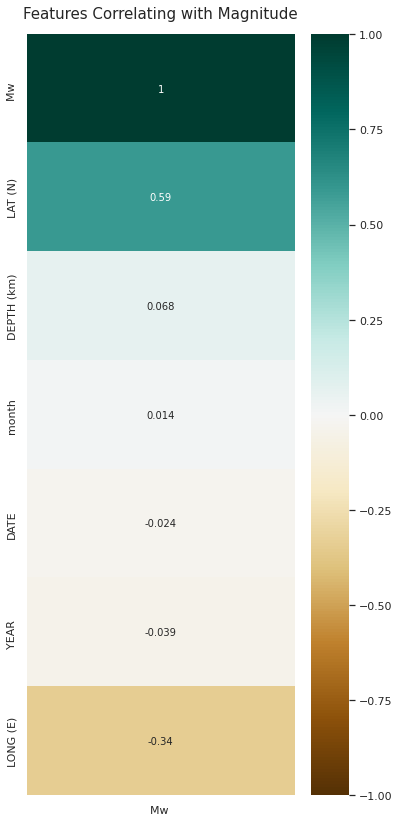

In [469]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 14))
heatmap = sns.heatmap(df.corr()[['Mw ']].sort_values(by='Mw ', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Magnitude', fontdict={'fontsize':15}, pad=16);

In [470]:
# Setting the initial threshold to 4.1
initial_threshold = 4.1
Mwlist = []
for mwlist in df['Mw '].iteritems():
 m_list = mwlist[1]
 if m_list < initial_threshold:
  index = 0
  Mwlist.append(index)
 else:
  index = 1
  Mwlist.append(index)
print(Mwlist)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 

In [471]:
# Dropping the Magnitude column
df.drop('Mw ' , axis = 1, inplace = True)
  # Creating the new Magnitude column
df.insert(3, 'Mw', Mwlist, True)
df['Mw'] = pd.to_numeric(df['Mw'])

In [472]:
y=df['Mw'].values
X=df.drop('Mw' , axis = 1).values



In [473]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

-------------------------------------------Data Cleaning Complete-------------------






**Plot ROC for both these classifiers for K as parameter in KNN, pre-
prune depth as a parameter in Decision Tree and number of estimators as parameter in ensemble learning.**

**Hyper Parameters for Decision Trees**

criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

Gini: The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.

Entropy is a measure of information that indicates the disorder of the features with the target.

splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

min_samples_split: The minimum number of samples required to split an internal node

In [474]:
# Decision Tree Classification before pre-puning
# Declare a Decision Tree classifier
dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
# Create Decision Tree on the training data
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [475]:
import pandas as pd
from sklearn.metrics import classification_report

# predicting 
dt_p=dt_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,dt_p))
# printing classification report
print(classification_report(y_test,dt_p))
print(accuracy_score(y_test,dt_p))

[[2518 1130]
 [1181 5769]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      3648
           1       0.84      0.83      0.83      6950

    accuracy                           0.78     10598
   macro avg       0.76      0.76      0.76     10598
weighted avg       0.78      0.78      0.78     10598

0.7819399886771089


In [476]:
# Calculate and draw the ROC Curve for Decision Trees before Pre-pruning
fpr , tpr, thresholds = roc_curve(y_test, dt_p)
tpr

array([0.        , 0.83007194, 1.        ])



ROC Curve for decision tree before calculating Pre-Prune depth.




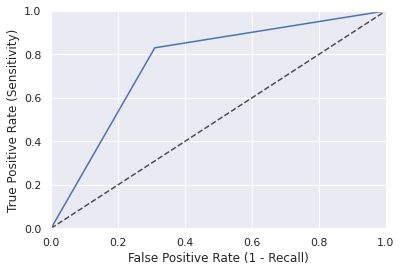



Area Under Curve: 0.76




In [477]:
# Plot a curve for decision tree before pre-prune depth
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC Curve for decision tree before calculating Pre-Prune depth.")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))


print("\n")

In [478]:
# Decision Tree classifier with Pre-Pruning at Max_depth=17
dt_clf1 = DecisionTreeClassifier(criterion= 'gini',max_depth= 17,min_samples_leaf= 3,min_samples_split= 12,splitter= 'random')
dt_clf1.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [479]:
# predicting pre-prune data 
dt_p1=dt_clf1.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,dt_p1))
# printing classification report
print(classification_report(y_test,dt_p1))
print(accuracy_score(y_test,dt_p1))

[[2846  802]
 [1031 5919]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.76      3648
           1       0.88      0.85      0.87      6950

    accuracy                           0.83     10598
   macro avg       0.81      0.82      0.81     10598
weighted avg       0.83      0.83      0.83     10598

0.8270428382713719


In [480]:
# Calculate and draw the ROC Curve for Decision Trees
fpr , tpr, thresholds = roc_curve(y_test, dt_p1)
tpr

array([0.        , 0.85165468, 1.        ])



ROC Curve for decision tree after calculating Pre-Prune depth.




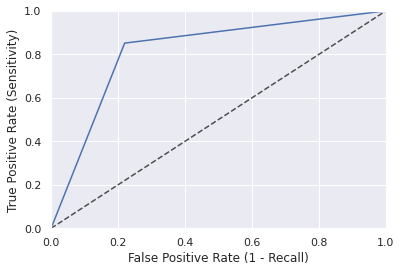



Area Under Curve: 0.82




In [481]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC Curve for decision tree after calculating Pre-Prune depth.")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')


plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))

print("\n")

Pre-Pruning Operation for Decision Tree :



Decision tree for pre-pruned depth




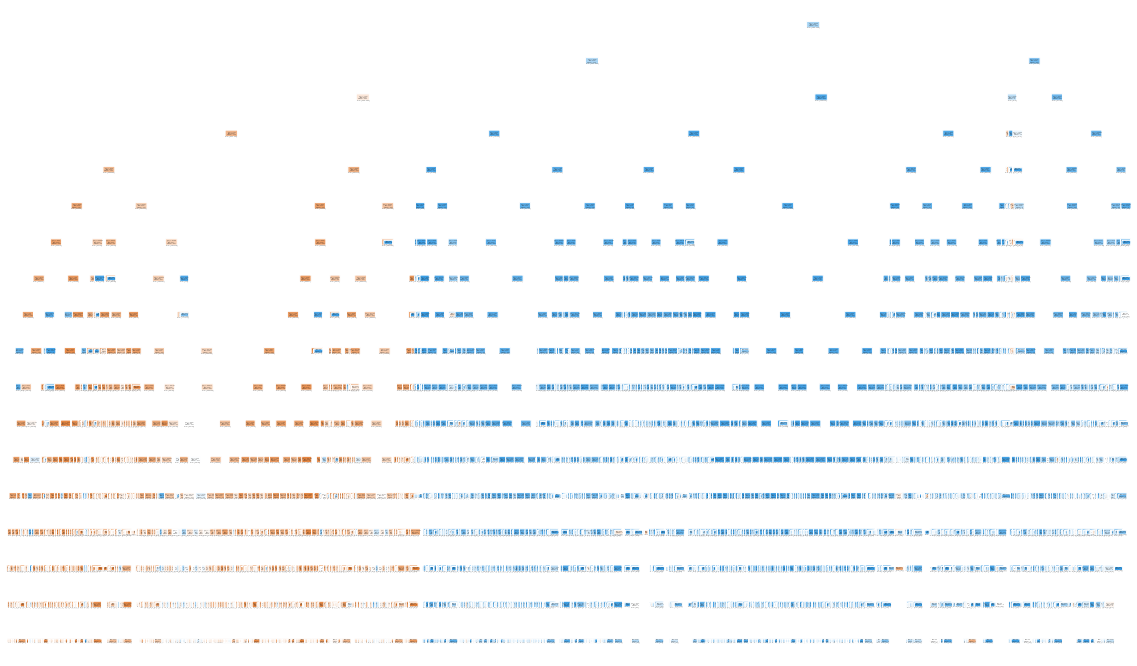

In [482]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt_clf1,rounded=True,filled=True)
print("\n")
print("Decision tree for pre-pruned depth")
print('\n')
plt.show()


In [483]:
# Checking the accuracy score of test dataset after pruning
y_predicted=dt_clf1.predict(X_test)
accuracy_score(y_test,y_predicted)

print("Accuracy Score:", accuracy_score(y_test,y_predicted))

Accuracy Score: 0.8270428382713719


In [484]:
# Fit KNN classifier and find the right number of neighbours that gives best performance.
# Show results for using both Euclidean distance and Manhattan Distance metric for the KNN classifier.

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# We store the classifier in clf variabale and gives the metrics and the best neighbours which fits our models
clf = KNeighborsClassifier(n_neighbors=12, metric="manhattan")
clf.fit(X_train, y_train)
Pred_y = clf.predict(X_test)
print(clf)
print("Score: %0.2f" % clf.score(X_train, y_train))
print("Accuracy of model at k=3 is ", metrics.accuracy_score(y_test, Pred_y))

print()
clf = KNeighborsClassifier(n_neighbors=12, metric="euclidean")
clf.fit(X_train, y_train)
knn_p = clf.predict(X_test)
print(clf)
print("Score: %0.2f" % clf.score(X_train, y_train))
print("Accuracy of model at k=3 is ", metrics.accuracy_score(y_test, Pred_y))

# Testing the accuracy score
n_neighbors=np.arange(3,12)
optimumk=[]
for neighbor in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=neighbor, metric="manhattan")
    knn_clf.fit(X_train, y_train)
    knn_p=knn_clf.predict(X_test)
    acc=accuracy_score(y_test,knn_p)
    optimumk.append(acc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')
Score: 0.86
Accuracy of model at k=3 is  0.8419513115682205

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')
Score: 0.86
Accuracy of model at k=3 is  0.8419513115682205


Plot for  max accuracy is 0.8431779581053029 when neighbors are 11


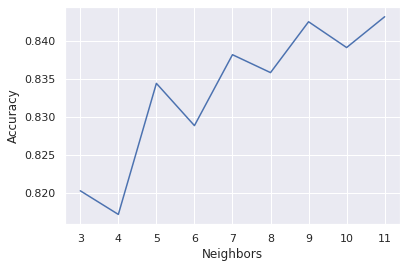

In [485]:
import matplotlib.pyplot as plt
#Plotting Graph
plt.plot(n_neighbors,optimumk)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
print(f'Plot for  max accuracy is {max(optimumk)} when neighbors are {n_neighbors[optimumk.index(max(optimumk))]}')

In [486]:
# Calculate and draw the ROC curve for KNN classifier

fpr , tpr, thresholds = roc_curve(y_test, knn_p)
tpr

array([0.        , 0.87539568, 1.        ])



ROC Curve for KNN Classifier




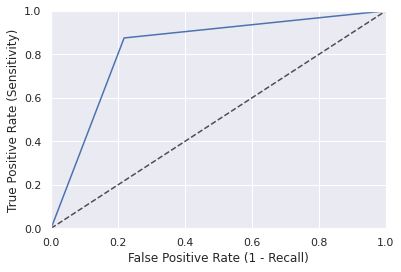



Area Under Curve: 0.83




In [487]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12

print("\n")
print ("ROC Curve for KNN Classifier")
print("\n")

plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

**Plot the ROC curve by using Ensemble Learning Techniques which include classifiers like Boosting, Bagging and Pasting, Random Forest)**

In [488]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [489]:
# predicting  
ada_p=ada_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,ada_p))
# printing classification report
print(classification_report(y_test,ada_p))
print(accuracy_score(y_test,ada_p))

[[2834  814]
 [ 896 6054]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3648
           1       0.88      0.87      0.88      6950

    accuracy                           0.84     10598
   macro avg       0.82      0.82      0.82     10598
weighted avg       0.84      0.84      0.84     10598

0.8386488016606907


In [490]:
# Calculation and execution process for the ROC Curve for ADABoosting
fpr , tpr, thresholds = roc_curve(y_test, ada_p)
tpr


array([0.        , 0.87107914, 1.        ])



ROC curve for AdaBoostClassifier




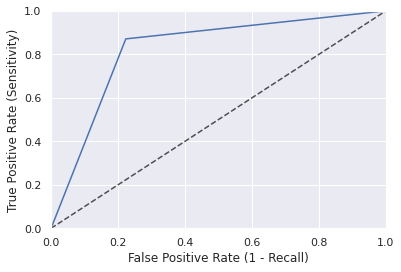



Area Under Curve: 0.82




In [491]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC curve for AdaBoostClassifier")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

**Bagging and Pasting using Scikit-Learn**

In [492]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False)
bag_clf.fit(X_train, y_train)
bag_p = bag_clf.predict(X_test)

In [493]:
# ROC Curve for Bagging and Pasting
fpr , tpr, thresholds = roc_curve(y_test, bag_p)
tpr


array([0.        , 0.84848921, 1.        ])



ROC curve for Bagging Classifier




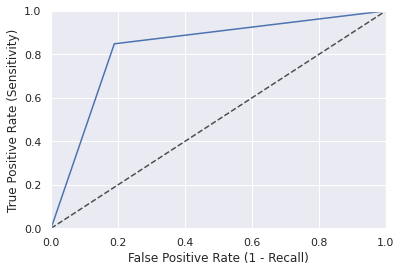



Area Under Curve: 0.83




In [494]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC curve for Bagging Classifier")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

In [495]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(n_estimators=500,max_depth=2, random_state=0)
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [496]:
# predicting based on random forest classifier
rfc_p=ada_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,rfc_p))
# printing classification report
print(classification_report(y_test,rfc_p))
print(accuracy_score(y_test,rfc_p))

[[2834  814]
 [ 896 6054]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3648
           1       0.88      0.87      0.88      6950

    accuracy                           0.84     10598
   macro avg       0.82      0.82      0.82     10598
weighted avg       0.84      0.84      0.84     10598

0.8386488016606907


In [497]:
# ROC CURVE FOR RANDOM FOREST
fpr , tpr, thresholds = roc_curve(y_test, rfc_p)
tpr



array([0.        , 0.87107914, 1.        ])



ROC curve for Random Forest Classifier




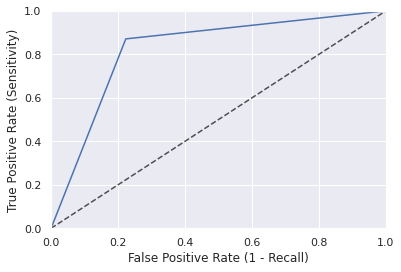



Area Under Curve: 0.82




In [498]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC curve for Random Forest Classifier")
print("\n")

plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

**Final Evaluation of the Model, calculation of various evaluation Metrics**

In [499]:
#Predicting for test data
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [500]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [501]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.839403661068126
Recall: 0.839403661068126
Precision: 0.839403661068126
F1-score: 0.8243772096952042


In [502]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[2898,  750],
       [ 952, 5998]])

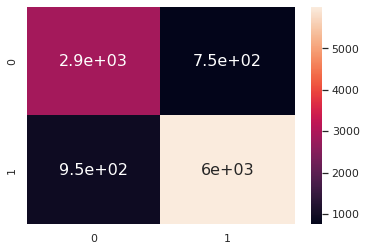

In [503]:
import seaborn as sns

#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

In [504]:
# Build the world map based on latitude and longitude
!pip install https://github.com/matplotlib/basemap/archive/master.zip




  Using cached https://github.com/matplotlib/basemap/archive/master.zip


In [505]:
from mpl_toolkits.basemap import Basemap

In [506]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

In [507]:
longitudes = df['LONG (E)'].tolist()
latitudes = df['LAT (N)'].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

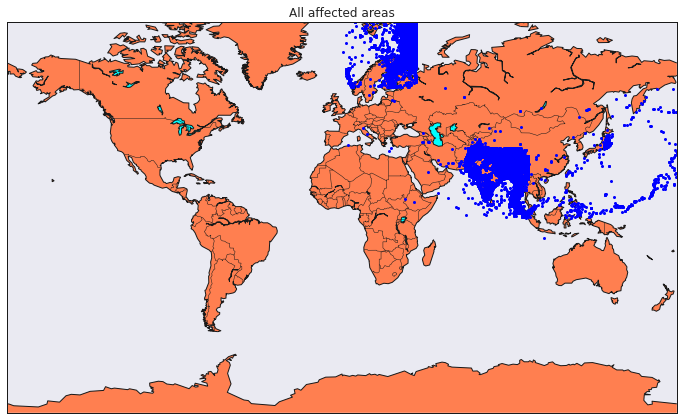

In [508]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

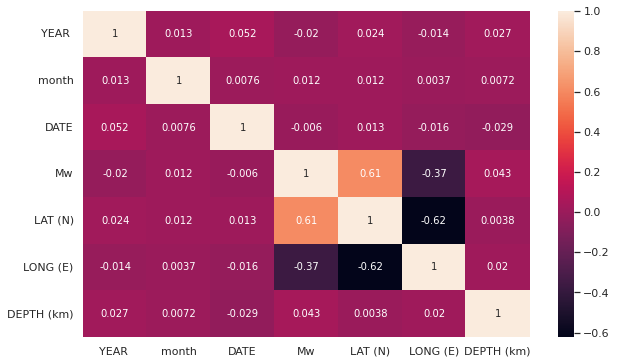

In [509]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cor=df.corr()

plt.figure (figsize = (10,6))
sns.heatmap(cor, annot = True)



In [510]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [511]:
# Predicting 
y_pred = clf.predict(X_test)
results = confusion_matrix(y_test, y_pred)
#print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test, y_pred))
print ('Classification Report : ')
print (classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is',log_loss(y_test, y_pred))

[[2898  750]
 [ 952 5998]]
Accuracy Score is 0.839403661068126
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      3648
           1       0.89      0.86      0.88      6950

    accuracy                           0.84     10598
   macro avg       0.82      0.83      0.82     10598
weighted avg       0.84      0.84      0.84     10598

AUC-ROC: 0.8287147387353276
LOGLOSS Value is 5.546857626175753


**Selecting the best algorithm from all the above classifier algorithm used based on accuracy**

In [512]:
#selecting the best algorithm from all the algorithms based on accuracy
classifier=[dt_clf,dt_clf1,knn_clf,ada_clf,rfc_clf,bag_clf]
predictions=[dt_p,y_predicted,knn_p,ada_p,rfc_p,bag_p]


for clf,pred in zip(classifier,predictions):
    print(f'accuracy with {clf.__class__.__name__} : {accuracy_score(y_test,pred)}')

accuracy with DecisionTreeClassifier : 0.7819399886771089
accuracy with DecisionTreeClassifier : 0.8270428382713719
accuracy with KNeighborsClassifier : 0.8431779581053029
accuracy with AdaBoostClassifier : 0.8386488016606907
accuracy with RandomForestClassifier : 0.8386488016606907
accuracy with BaggingClassifier : 0.8356293640309492


**Score Comparison for Bagging Classifier and Random Forest Classifier**

In [513]:
# Score Comparison for Bagging Classifier and Random Forest Classifier

np.sum(bag_p == rfc_p) / len(bag_p)

print("Prediction score for Bagging Classifier and Random Forest Classifier : ", np.sum(bag_p == rfc_p) / len(bag_p))

Prediction score for Bagging Classifier and Random Forest Classifier :  0.9652764672579732


In [575]:
df1.head()

,Sl. No.,YEAR,MONTH,DATE,(UTC),(IST),Mw,Mw,Mb,Mb.1,Ms,ML,LAT (N),LONG (E),DEPTH (km),INTENSITY,Unnamed: 16,Unnamed: 17,LOCATION,REFERENCE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MM,MMI,MME,NaN,NaN
1,1.0,-2474.0,0,0.0,NaN,NaN,7.5000,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
2,2.0,-325.0,0,0.0,NaN,NaN,7.5000,7.5,NaN,6.969202899,7.260619977,7.427072403,71,24,0.0,NaN,NaN,NaN,NaN,Dr STGR
3,3.0,25.0,0,0.0,NaN,NaN,7.5000,7.5,NaN,6.969202899,7.260619977,7.427072403,72.9,33.72,0.0,NaN,NaN,NaN,NaN,Dr STGR
4,4.0,26.0,5,10.0,08.19.10.0,NaN,6.1397,6.1397,5.737047101,5.737047101,5.698851894,5.999685205,17.3,80.1,NaN,NaN,NaN,NaN,NaN,NEIC


In [576]:
df1.drop(['Sl. No.','Mb.1', 'Ms', 'ML', 'Mb','Unnamed: 16', 'Unnamed: 17', 'LOCATION', 'DEPTH (km)', 'INTENSITY', '(UTC)'], axis=1, inplace = True)

In [577]:
df1.head()

,YEAR,MONTH,DATE,(IST),Mw,Mw,LAT (N),LONG (E),REFERENCE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2474.0,0,0.0,NaN,7.5000,7.5,71,24,Dr STGR
2,-325.0,0,0.0,NaN,7.5000,7.5,71,24,Dr STGR
3,25.0,0,0.0,NaN,7.5000,7.5,72.9,33.72,Dr STGR
4,26.0,5,10.0,NaN,6.1397,6.1397,17.3,80.1,NEIC


In [578]:
df1.drop(['(IST)', 'Mw'], axis=1, inplace = True)

In [580]:
df1=df1.drop(labels=[0], axis=0) 

In [570]:
df1.isnull().sum()

YEAR             0
MONTH        52990
DATE             0
Mw               0
LAT (N)          0
LONG (E)         0
REFERENCE        0
dtype: int64

In [581]:
df1=df1.fillna(0)

In [582]:
df1.head()

,YEAR,MONTH,DATE,Mw,LAT (N),LONG (E),REFERENCE
1,-2474.0,0,0.0,7.5000,71,24,Dr STGR
2,-325.0,0,0.0,7.5000,71,24,Dr STGR
3,25.0,0,0.0,7.5000,72.9,33.72,Dr STGR
4,26.0,5,10.0,6.1397,17.3,80.1,NEIC
5,26.0,5,10.0,6.1397,26,97,G-R


In [583]:
df1.isnull().sum()

YEAR         0
MONTH        0
DATE         0
Mw           0
LAT (N)      0
LONG (E)     0
REFERENCE    0
dtype: int64

In [585]:
# Encoding the Reference column
df1['REFERENCE'] = df1['REFERENCE'].apply(str)



labelencoder = LabelEncoder()



df1['REFERENCE'] = labelencoder.fit_transform(df1['REFERENCE'])

In [590]:
df1['LAT (N)'].replace({'°':''}, regex=True, inplace=True)
df1['LAT (N)'].replace({' ':''}, regex=True, inplace=True)
df1['LAT (N)'].replace({'N':''}, regex=True, inplace=True)
df1['LAT (N)'].replace({'S':''}, regex=True, inplace=True)
df1['LAT (N)'].replace({',':'.'}, regex=True, inplace=True)
# df['LAT (N)'].replace({'':''}, regex=True, inplace=True)

In [591]:
df1['LONG (E)'].replace({'°':''}, regex=True, inplace=True)
df1['LONG (E)'].replace({'E':''}, regex=True, inplace=True)
df1['LONG (E)'].replace({'W':''}, regex=True, inplace=True)
df1['LONG (E)'].replace({',':'.'}, regex=True, inplace=True)
df1['LONG (E)'].replace({'S':''}, regex=True, inplace=True)
df1['LONG (E)'].replace({' ':''}, regex=True, inplace=True)

In [592]:
df1.replace(" ",0, inplace=True)
df1.replace('#VALUE!',0,inplace=True)

df1.replace('..',0,inplace=True)

In [593]:
# Creating a empty list for Latitude and Longitude values

latitude_list = []

longitude_list = []

# Doing iteration for each Latitude values to remove ? symbol given in the dataset.

for lat in df1['LAT (N)'].iteritems():
  initial = lat[1]
  initial1 = initial.replace('?', '')
  latitude_list.append(initial1)

for long in df1['LONG (E)'].iteritems():
  long_data = long[1]
  long_data1 = long_data.replace('?', '')
  longitude_list.append(long_data1)  


# Drop the 'LAT (N)', 'LONG (E)' column
df1.drop('LAT (N)', axis = 1, inplace = True)

df1.drop('LONG (E)', axis = 1, inplace = True)
df1.insert(4, "LAT (N)", latitude_list, True)
df1.insert(5, "LONG (E)", longitude_list, True)

In [ ]:
df1['MONTH ']

In [595]:
# df[] = pd.to_numeric(df["A"], downcast="float")
df1['MONTH '] = pd.to_numeric(df1['MONTH '])
df1["LAT (N)"] = pd.to_numeric(df1["LAT (N)"])
df1["LONG (E)"] = pd.to_numeric(df1["LONG (E)"])


In [596]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52989 entries, 1 to 52989
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       52989 non-null  float64
 1   MONTH      52989 non-null  int64  
 2   DATE       52989 non-null  float64
 3   Mw         52989 non-null  float64
 4   LAT (N)    52989 non-null  float64
 5   LONG (E)   52989 non-null  float64
 6   REFERENCE  52989 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 3.2 MB


In [597]:
# Setting the initial threshold to 4.1
initial_threshold = 4.1
Mwlist = []
for mwlist in df1['Mw '].iteritems():
 m_list = mwlist[1]
 if m_list < initial_threshold:
  index = 0
  Mwlist.append(index)
 else:
  index = 1
  Mwlist.append(index)
print(Mwlist)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 

In [598]:
# Dropping the Magnitude column
df1.drop('Mw ' , axis = 1, inplace = True)
  # Creating the new Magnitude column
df1.insert(3, 'Mw', Mwlist, True)
df1['Mw'] = pd.to_numeric(df1['Mw'])

In [599]:
y=df1['Mw'].values
X=df1.drop('Mw' , axis = 1).values

In [600]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [601]:
# Decision Tree Classification before pre-puning
# Declare a Decision Tree classifier
dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
# Create Decision Tree on the training data
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [602]:
import pandas as pd
from sklearn.metrics import classification_report

# predicting 
dt_p=dt_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,dt_p))
# printing classification report
print(classification_report(y_test,dt_p))
print(accuracy_score(y_test,dt_p))

[[2625 1112]
 [1109 5752]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      3737
           1       0.84      0.84      0.84      6861

    accuracy                           0.79     10598
   macro avg       0.77      0.77      0.77     10598
weighted avg       0.79      0.79      0.79     10598

0.7904321570107568


In [603]:
# Calculate and draw the ROC Curve for Decision Trees before Pre-pruning
fpr , tpr, thresholds = roc_curve(y_test, dt_p)
tpr

array([0.        , 0.83836175, 1.        ])



ROC Curve for decision tree before calculating Pre-Prune depth.




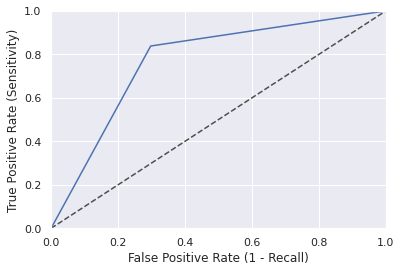



Area Under Curve: 0.77




In [604]:
# Plot a curve for decision tree before pre-prune depth
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC Curve for decision tree before calculating Pre-Prune depth.")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))


print("\n")

In [605]:
# Decision Tree classifier with Pre-Pruning at Max_depth=17
dt_clf1 = DecisionTreeClassifier(criterion= 'gini',max_depth= 17,min_samples_leaf= 3,min_samples_split= 12,splitter= 'random')
dt_clf1.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [606]:
# predicting pre-prune data 
dt_p1=dt_clf1.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,dt_p1))
# printing classification report
print(classification_report(y_test,dt_p1))
print(accuracy_score(y_test,dt_p1))

[[2753  984]
 [ 587 6274]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      3737
           1       0.86      0.91      0.89      6861

    accuracy                           0.85     10598
   macro avg       0.84      0.83      0.83     10598
weighted avg       0.85      0.85      0.85     10598

0.8517644838648801


In [607]:
# Calculate and draw the ROC Curve for Decision Trees
fpr , tpr, thresholds = roc_curve(y_test, dt_p1)
tpr

array([0.        , 0.91444396, 1.        ])



ROC Curve for decision tree after calculating Pre-Prune depth.




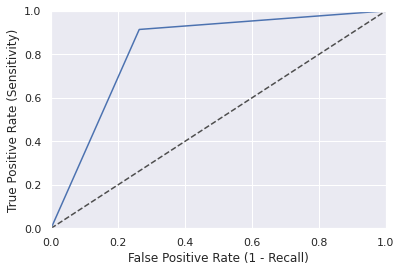



Area Under Curve: 0.83




In [608]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC Curve for decision tree after calculating Pre-Prune depth.")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')


plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))

print("\n")



Decision tree for pre-pruned depth




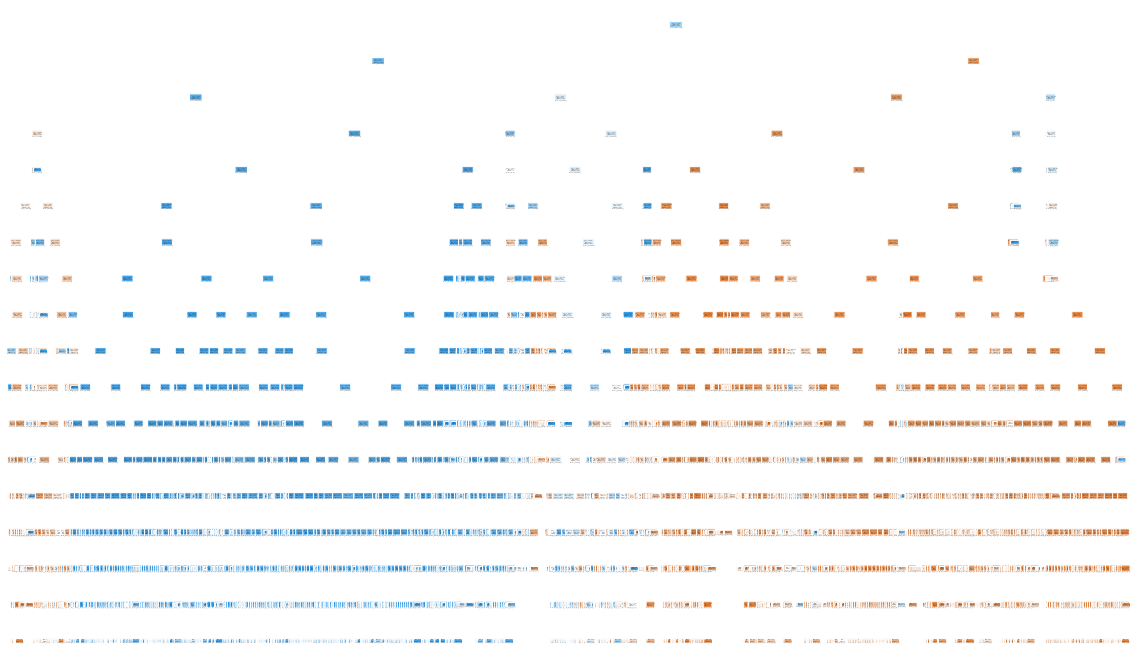

In [609]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt_clf1,rounded=True,filled=True)
print("\n")
print("Decision tree for pre-pruned depth")
print('\n')
plt.show()


In [610]:
# Checking the accuracy score of test dataset after pruning
y_predicted=dt_clf1.predict(X_test)
accuracy_score(y_test,y_predicted)

print("Accuracy Score:", accuracy_score(y_test,y_predicted))

Accuracy Score: 0.8517644838648801


In [611]:
# Fit KNN classifier and find the right number of neighbours that gives best performance.
# Show results for using both Euclidean distance and Manhattan Distance metric for the KNN classifier.

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# We store the classifier in clf variabale and gives the metrics and the best neighbours which fits our models
clf = KNeighborsClassifier(n_neighbors=12, metric="manhattan")
clf.fit(X_train, y_train)
Pred_y = clf.predict(X_test)
print(clf)
print("Score: %0.2f" % clf.score(X_train, y_train))
print("Accuracy of model at k=3 is ", metrics.accuracy_score(y_test, Pred_y))

print()
clf = KNeighborsClassifier(n_neighbors=12, metric="euclidean")
clf.fit(X_train, y_train)
knn_p = clf.predict(X_test)
print(clf)
print("Score: %0.2f" % clf.score(X_train, y_train))
print("Accuracy of model at k=3 is ", metrics.accuracy_score(y_test, Pred_y))

# Testing the accuracy score
n_neighbors=np.arange(3,12)
optimumk=[]
for neighbor in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=neighbor, metric="manhattan")
    knn_clf.fit(X_train, y_train)
    knn_p=knn_clf.predict(X_test)
    acc=accuracy_score(y_test,knn_p)
    optimumk.append(acc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')
Score: 0.87
Accuracy of model at k=3 is  0.8534629175316097

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')
Score: 0.87
Accuracy of model at k=3 is  0.8534629175316097


Plot for  max accuracy is 0.853745989809398 when neighbors are 11


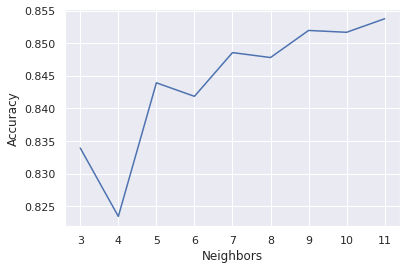

In [612]:
import matplotlib.pyplot as plt
#Plotting Graph
plt.plot(n_neighbors,optimumk)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
print(f'Plot for  max accuracy is {max(optimumk)} when neighbors are {n_neighbors[optimumk.index(max(optimumk))]}')

In [613]:
# Calculate and draw the ROC curve for KNN classifier

fpr , tpr, thresholds = roc_curve(y_test, knn_p)
tpr

array([0.       , 0.8972453, 1.       ])



ROC Curve for KNN Classifier




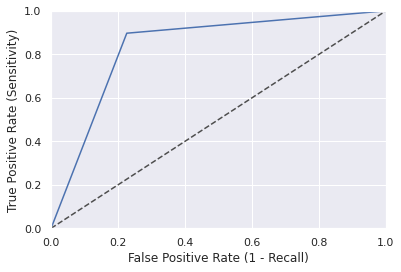



Area Under Curve: 0.84




In [614]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12

print("\n")
print ("ROC Curve for KNN Classifier")
print("\n")

plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

In [615]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [616]:
# predicting  
ada_p=ada_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,ada_p))
# printing classification report
print(classification_report(y_test,ada_p))
print(accuracy_score(y_test,ada_p))

[[2856  881]
 [ 714 6147]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      3737
           1       0.87      0.90      0.89      6861

    accuracy                           0.85     10598
   macro avg       0.84      0.83      0.83     10598
weighted avg       0.85      0.85      0.85     10598

0.849499905642574


In [617]:
# Calculation and execution process for the ROC Curve for ADABoosting
fpr , tpr, thresholds = roc_curve(y_test, ada_p)
tpr


array([0.        , 0.89593354, 1.        ])



ROC curve for AdaBoostClassifier




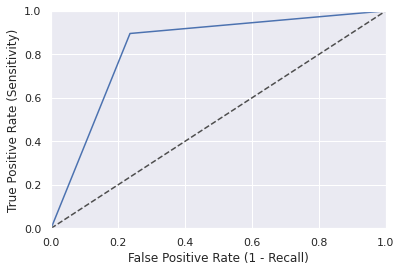



Area Under Curve: 0.83




In [618]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC curve for AdaBoostClassifier")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

**Bagging and Pasting using Scikit-Learn**

In [619]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False)
bag_clf.fit(X_train, y_train)
bag_p = bag_clf.predict(X_test)

In [620]:
# ROC Curve for Bagging and Pasting
fpr , tpr, thresholds = roc_curve(y_test, bag_p)
tpr


array([0.        , 0.90132634, 1.        ])



ROC curve for Bagging Classifier




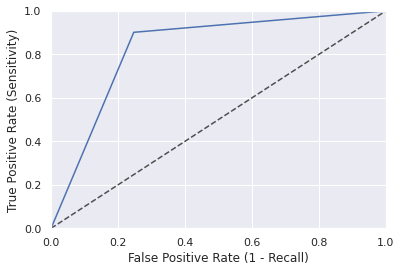



Area Under Curve: 0.83




In [621]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC curve for Bagging Classifier")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

In [622]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(n_estimators=500,max_depth=2, random_state=0)
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [623]:
# predicting based on random forest classifier
rfc_p=ada_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,rfc_p))
# printing classification report
print(classification_report(y_test,rfc_p))
print(accuracy_score(y_test,rfc_p))

[[2856  881]
 [ 714 6147]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      3737
           1       0.87      0.90      0.89      6861

    accuracy                           0.85     10598
   macro avg       0.84      0.83      0.83     10598
weighted avg       0.85      0.85      0.85     10598

0.849499905642574


In [624]:
# ROC CURVE FOR RANDOM FOREST
fpr , tpr, thresholds = roc_curve(y_test, rfc_p)
tpr



array([0.        , 0.89593354, 1.        ])



ROC curve for Random Forest Classifier




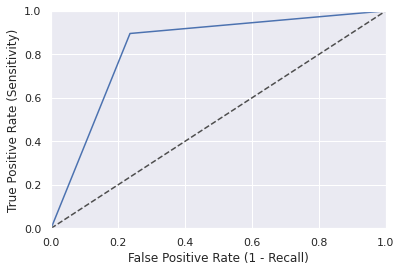



Area Under Curve: 0.83




In [625]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC curve for Random Forest Classifier")
print("\n")

plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

In [626]:
#Predicting for test data
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [627]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [628]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.8546895640686922
Recall: 0.8546895640686922
Precision: 0.8546895640686922
F1-score: 0.8406475873217618


In [629]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[2956,  781],
       [ 759, 6102]])

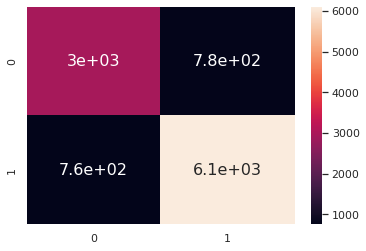

In [630]:
import seaborn as sns

#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

In [631]:
# Build the world map based on latitude and longitude
!pip install https://github.com/matplotlib/basemap/archive/master.zip




  Using cached https://github.com/matplotlib/basemap/archive/master.zip


In [632]:
from mpl_toolkits.basemap import Basemap

In [633]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

In [634]:
longitudes = df1['LONG (E)'].tolist()
latitudes = df1['LAT (N)'].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

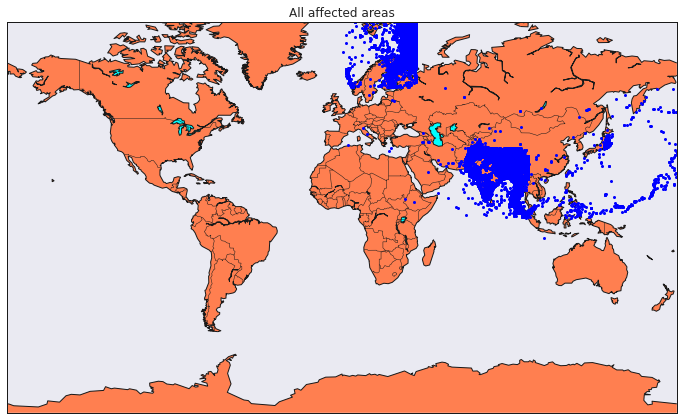

In [635]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

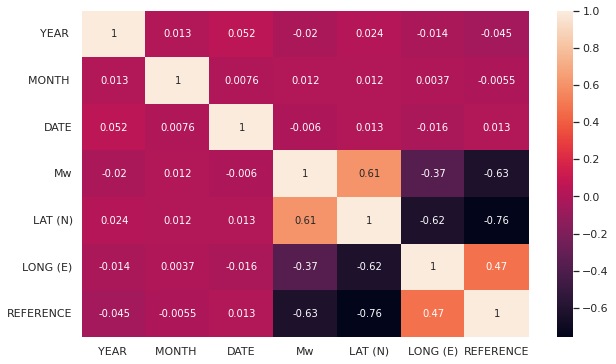

In [636]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cor=df1.corr()

plt.figure (figsize = (10,6))
sns.heatmap(cor, annot = True)



In [637]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [638]:
# Predicting 
y_pred = clf.predict(X_test)
results = confusion_matrix(y_test, y_pred)
#print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test, y_pred))
print ('Classification Report : ')
print (classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is',log_loss(y_test, y_pred))

[[2956  781]
 [ 759 6102]]
Accuracy Score is 0.8546895640686922
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3737
           1       0.89      0.89      0.89      6861

    accuracy                           0.85     10598
   macro avg       0.84      0.84      0.84     10598
weighted avg       0.85      0.85      0.85     10598

AUC-ROC: 0.8401917786645066
LOGLOSS Value is 5.018903579331519


In [639]:
#selecting the best algorithm from all the algorithms based on accuracy
classifier=[dt_clf,dt_clf1,knn_clf,ada_clf,rfc_clf,bag_clf]
predictions=[dt_p,y_predicted,knn_p,ada_p,rfc_p,bag_p]


for clf,pred in zip(classifier,predictions):
    print(f'accuracy with {clf.__class__.__name__} : {accuracy_score(y_test,pred)}')

accuracy with DecisionTreeClassifier : 0.7904321570107568
accuracy with DecisionTreeClassifier : 0.8517644838648801
accuracy with KNeighborsClassifier : 0.853745989809398
accuracy with AdaBoostClassifier : 0.849499905642574
accuracy with RandomForestClassifier : 0.849499905642574
accuracy with BaggingClassifier : 0.8490281185129269


In [640]:
# Score Comparison for Bagging Classifier and Random Forest Classifier

np.sum(bag_p == rfc_p) / len(bag_p)

print("Prediction score for Bagging Classifier and Random Forest Classifier : ", np.sum(bag_p == rfc_p) / len(bag_p))

Prediction score for Bagging Classifier and Random Forest Classifier :  0.9585770900169843


In [528]:
df1=df1.fillna(0)




In [641]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52989 entries, 1 to 52989
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       52989 non-null  float64
 1   MONTH      52989 non-null  int64  
 2   DATE       52989 non-null  float64
 3   Mw         52989 non-null  int64  
 4   LAT (N)    52989 non-null  float64
 5   LONG (E)   52989 non-null  float64
 6   REFERENCE  52989 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 3.2 MB


In [ ]:
# Setting the initial threshold to 4.1
initial_threshold = 4.1
Mwlist = []
for mwlist in df1['Mw'].iteritems():
 m_list = mwlist[1]
 if m_list < initial_threshold:
  index = 0
  Mwlist.append(index)
 else:
  index = 1
  Mwlist.append(index)
print(Mwlist)

**Report for the classification Assignment**

2. Which is the better classifier for this data amongst the three? Give Reasoning.

Ans: 
Considering all the classification techniques that are used on the dataset, the Bagging Classifier and Random Forest Classifier and  shows a accuracy score of 0.84, when compared with other classifiers. To justify the reasoning, the above said techniques contains the calculated score of the accuracy, ROC curve. Thus, based on the obtained results the Bagging Classifier and Random Forest Classifier is being considered as better classifiers.


3. What could be the best possible values of the parameters for respective
classifier based on the ROC curves? Give Reasoning.

Ans:

Generally, the AUC-ROC curve values lie between 0.5 to 1.0, where the 0.5 depicts that the classifier is not able to distinguish between positive and negative class points. Typically, score ranging from 0.7 to 0.8 values are considered to be acceptable and if if the score is more than 0.9 then it is considered as outstanding class point.

Few possible values of the parameters for respective classifier based on the ROC curves are being listed.

**Decision Tree:** 

1. **Initial Decision Tree Parameters:** The parameters used in the calculating the scores for the decision tree are the criterion, splitter, max_depth, min_samples_split.

2. **Pre Prune Depth technique parameters for Decision Tree:** The parameters used in the calculating the scores for the decision tree are the criterion , max_depth, min_sample_leaf, min_samples_split, splitter

For both the initial and pre-prune depth the criterion used is entropy as it helps in the information gain from the given cleaned dataset.

The major difference between the initial and pre-prune depth technique is that the min_sample_leaf, min_sample_split and max_depth optimal values are used, based on the data available in the User Guide of the DecisionTreeClassifier.

The results for initial and after applying the pre-prune depth technique on decision tree are encouraging, as there is slight difference in the accuracy scores and values under the area of curve. 

*  **KNeighborsClassifier:** 

In KNN classifier, values of K are considered to be ranging from 3 to 12. This ensured that the optimum value of K gave the max accuracy of 0.84 when the neighbours are at 11.

There are two parameters of KNeighbour Classifier which are depicted as metric. Those metric are euclidean and manhattan. 

Considering the results for both the metrics the K value was optimal at 3. Parameters used for the calculation are n_neighbors=neighbor, metric.

**Ensemble Learning**

* **AdaBoostClassifier**:

In Adaboost classifer, the parameters used to get the encouraging results are n_estimators. Basically the default value of the n_estimators is 50, which refers to that the boosting process is terminated at the estimation. 

In the case of the usage of dataset the number of estimators is 100, to check the perfect fit of the data from the dataframe. The accuracy score of the AdaBoostClassifier after calcluation lies to 0.84. 


* **RandomForestClassifier**:

Using Random Forest Technique, the n_estimators denote the number of trees in the random forest. For, the evaluation and calculation of the dataset and to get the accuracy score and other calculated values we consider the parameter of n_estimators as 500 at max_depth=2, random_state=0. 

* **BaggingClassifier**

The default parameters for the BaggingClassifier is 10, this denotes the total number of base estimators in the ensemble. Herein,the estimator or the parameters used for the assignment are n_estimators=500,max_samples=100, bootstrap=False. 

Generally, the prediction score for the Random Forest and Bagging classifiers are the approximately the same and after all the calculation the range lies to 0.96






4. If you have to choose only a subset of two features to predict earthquake,
which ones would it be? Give Reasoning. [Hint: You may use nodes of
estimated Decision Tree or other techniques]

Ans: If I have given a choice to choose the subset of two features to predict earthquake those would be month, latitude. This choice is done based on the heatmap drawn from the given dataframe, where the features correlating to the magnitude is calculated and output is captured. Major reason for this selection, is due to the prediction that there are some areas, where the earth quake erupt more than once in the same month.

5. Consider test results of the best model from above analysis. Report the input features that was used to achieve this. Try to improvise the test results
by applying feature processing (You may come up with additional features
by processing original ones). Report the new set of features that was used and also report the improvements in test results that was achieved. Please use appropriate metrics to report the results.

Ans:  The test results of the best model from above analysis are considered to be 0.95 from the Bagging Classifier and Random Forest Classifier technique calculations. The additional input feature taken is reference and the technique used for the improvising the scores is labelencoder technique. The classifiers are executed against the new dataframe which include reference column with data. 

